<div style="background-color:#FCE205; padding:10px; border-radius:5px; color:black; font-weight:bold;">
    <h2>Exploratory Data Analysis</h2>
</div>

At the end of this project, we want to forecast the percent lost bee colonies for the following year. 

Lets have a look at the data and figure out what is influencing bee colony loss across the United States of America.

<div style="background-color:#FCE205; padding:10px; border-radius:5px; color:black; font-weight:bold;">
    <h4>Bees Features</h4>
</div>

- **`state:`** state within the USA. Note, other is a collection of states for privacy reasons. And the United States state is the average across all states.

- **`num_colonies:`** number of honey bee colonies

- **`max_colonies:`** max number of honey bee colonies for that quarter

- **`lost_colonies:`** number of colonies that were lost during that quarter

- **`percent_lost:`** percentage of honey bee colonies lost during that quarter

- **`renovated_colonies:`** colonies that were 'requeened' or received new bees

- **`percent_renovated:`** percentage of honey bee colonies that were renovated

- **`quarter:`** Q1 is Jan to March, Q2 is April to June, Q3 is July to September, and Q4 is October to December

- **`year:`** year between 2015 and 2022

- **`varroa_mites:`** Percentage of colonies affected by a species of mite that affects honey bee populations

- **`other_pests_and_parasites:`** Percentage of colonies affected by a collection of other harmful critters

- **`diseases:`** Percentage of colonies affected by certain diseases

- **`pesticides:`** Percentage of colonies affected by the use of certain pesticides

- **`other_or_unknown:`** Percentage of colonies affected by an unlisted or unknown cause

<div style="background-color:#FCE205; padding:10px; border-radius:5px; color:black; font-weight:bold;">
    <h4>Weather Features</h4>
</div>

- **`temperature_2m_mean`** → Mean daily air temperature at **2 meters above ground** (°C).  
- **`temperature_2m_min`** → Minimum daily air temperature at **2 meters above ground** (°C).    
- **`temperature_2m_max`** → Maximum daily air temperature at **2 meters above ground** (°C). 
- **`relative_humidity_2m_mean`** → Mean relative humidity at  **2 meters above ground** (%).  
- **`relative_humidity_2m_min`** → Minimum relative humidity at **2 meters above ground** (%).    
- **`relative_humidity_2m_max`** → Maximum relative humidity at **2 meters above ground** (%). 

- **`precipitation_hours`** → The number of hours with rain in **hours (h)**.  
- **`wind_speed_10m_max`** → Maximum wind speed and gusts on a day in **km/h**.  

- **`weathercode`** → The most severe **weather condition** on a given day.  

| Weather Code | Description |
|-------------|------------|
| 0  | Clear sky |
| 1  | Mainly clear |
| 2  | Partly cloudy |
| 3  | Overcast |
| 51 | Light drizzle |
| 53 | Moderate drizzle |
| 55 | Heavy drizzle |
| 56 | Light freezing drizzle |
| 61 | Light rain |
| 63 | Moderate rain |
| 65 | Heavy rain |
| 71 | Light snow |
| 73 | Moderate snow |
| 75 | Heavy snow |

<div style="background-color:#FCE205; padding:10px; border-radius:5px; color:black; font-weight:bold;">
    <h4>Drought Features</h4>
</div>

- **`D0`** - Total percent land area affected by **Abnormally Dry** conditions per week.
- **`D1`** - Total percent land area affected by **Moderate Drought** conditions per week.
- **`D2`** - Total percent land area affected by **Severe Drought** conditions per week.
- **`D3`** - Total percent land area affected by **Extreme Drought** conditions per week.
- **`D4`** - Total percent land area affected by **Exceptional Drought** conditions per week.

**`_mean`:** Mean % area per quarter
For seeing how widespread a drought level was on average during the quarter.


**`_max`:** Max % area per quarter
To catch peak drought severity.

<div style="background-color:#FCE205; padding:10px; border-radius:5px; color:black; font-weight:bold;">
    <h4>Data Evaluation</h4>
</div>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import os
import sys
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

sys.path.append(os.path.abspath('../utils'))
from tinne_utils import (bee_stressor_palette, interactive_choropleth_by_year, heatmap_colonies_over_time, plot_bee_colony_trends, plot_temperature_features_by_quarter,
plot_precipitation_by_quarter, plot_weather_conditions_by_quarter, plot_drought_by_quarter, plot_stressors_by_quarter, plot_percent_loss_by_quarter)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# set working directory
ITM_DIR = os.path.join(os.getcwd(), '../data/cleaned')

In [3]:
# read in data
bees = pd.read_csv(os.path.join(ITM_DIR, 'bees_clean_imputed.csv'))
# set date from year and quarter columns
bees['date'] = pd.to_datetime(bees['year'].astype(str) + 'Q' + bees['quarter'].astype(str))

In [4]:
bees

,state,latitude,longitude,quarter,temperature_2m_meanmean,temperature_2m_meansum,relative_humidity_2m_meanmean,relative_humidity_2m_meansum,wind_speed_10m_maxmax,temperature_2m_maxmax,...,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_pests_and_parasites,diseases,pesticides,other_or_unknown,date
0,Alabama,32.806671,-86.791130,1,9.138389,822.454992,72.118324,6490.649186,31.782108,25.149500,...,26.0,2800.0,250.0,4.0,10.0,5.4,0.0,2.2,9.4,2015-01-01
1,Iowa,42.011539,-93.210526,1,-4.200727,-378.065423,68.218407,6139.656594,41.624780,25.633000,...,18.0,1700.0,270.0,2.0,26.0,0.7,4.6,3.4,18.0,2015-01-01
2,Tennessee,35.747845,-86.692345,1,4.318264,388.643751,68.740151,6186.613583,33.480000,23.587500,...,21.0,1000.0,190.0,2.0,22.2,17.1,0.0,0.0,13.0,2015-01-01
3,Indiana,39.849426,-86.258278,1,-2.129259,-191.633322,69.024403,6212.196268,37.971040,21.185000,...,22.0,490.0,120.0,1.0,20.7,0.3,0.2,0.3,22.3,2015-01-01
4,Illinois,40.633125,-89.398529,1,-2.720329,-244.829581,68.105295,6129.476541,37.379375,22.578999,...,40.0,2300.0,390.0,4.0,12.3,6.9,0.7,0.4,12.6,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Maine,45.367584,-68.972168,4,4.047483,372.368403,73.314436,6744.928069,37.688404,22.261501,...,3.0,0.0,60.0,1.0,9.0,2.3,0.0,8.1,0.7,2022-10-01
1432,Virginia,37.769337,-78.169968,4,9.388417,863.734354,68.866433,6335.711867,28.449112,27.140500,...,12.0,300.0,750.0,7.0,43.3,20.9,0.0,0.0,6.4,2022-10-01
1433,Louisiana,31.169546,-91.867805,4,15.704791,1444.840778,69.540703,6397.744701,42.765812,32.035000,...,9.0,170.0,640.0,2.0,18.5,9.1,1.2,2.1,5.2,2022-10-01
1434,Oklahoma,35.565342,-96.928917,4,10.814065,994.893941,63.243830,5818.432320,34.949680,30.613000,...,1.0,0.0,0.0,0.0,10.4,1.1,0.0,1.3,0.9,2022-10-01


In [4]:
bees.columns

Index(['state', 'latitude', 'longitude', 'quarter', 'temperature_2m_meanmean',
       'temperature_2m_meansum', 'relative_humidity_2m_meanmean',
       'relative_humidity_2m_meansum', 'wind_speed_10m_maxmax',
       'temperature_2m_maxmax', 'relative_humidity_2m_maxmax',
       'temperature_2m_minmin', 'relative_humidity_2m_minmin',
       'precipitation_hours_sum', 'moderate_drizzle_sum', 'moderate_rain_sum',
       'light_rain_sum', 'heavy_rain_sum', 'overcast_sum', 'partly_cloudy_sum',
       'clear_sky_sum', 'light_drizzle_sum', 'mainly_clear_sum',
       'heavy_drizzle_sum', 'light_snow_sum', 'heavy_snow_sum',
       'moderate_snow_sum', 'year', 'D0_mean', 'D1_mean', 'D2_mean', 'D3_mean',
       'D4_mean', 'D0_max', 'D1_max', 'D2_max', 'D3_max', 'D4_max',
       'state_code', 'num_colonies', 'max_colonies', 'lost_colonies',
       'percent_lost', 'added_colonies', 'renovated_colonies',
       'percent_renovated', 'varroa_mites', 'other_pests_and_parasites',
       'diseases', 'pes

In [5]:
interactive_choropleth_by_year(bees, 'percent_lost', title_prefix='Percent of Bee Colonies Lost in ')

Dropdown(description='Year:', options=(2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022), style=DescriptionStyle…

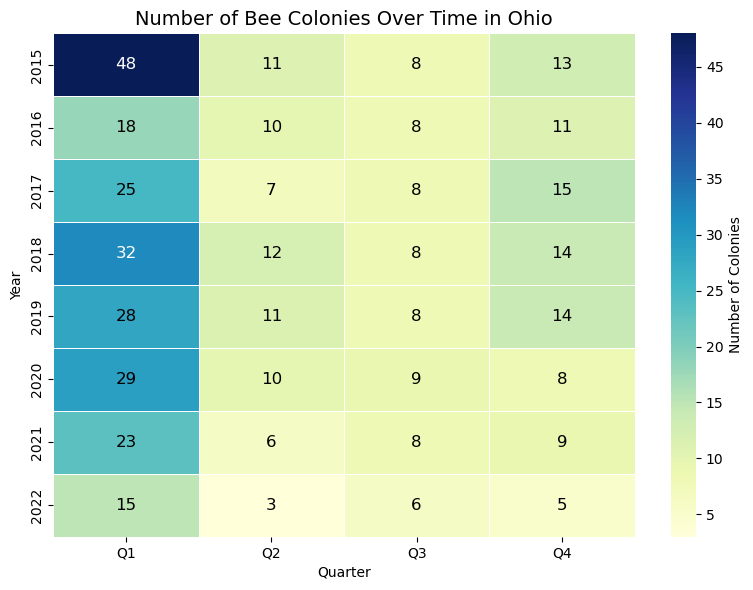

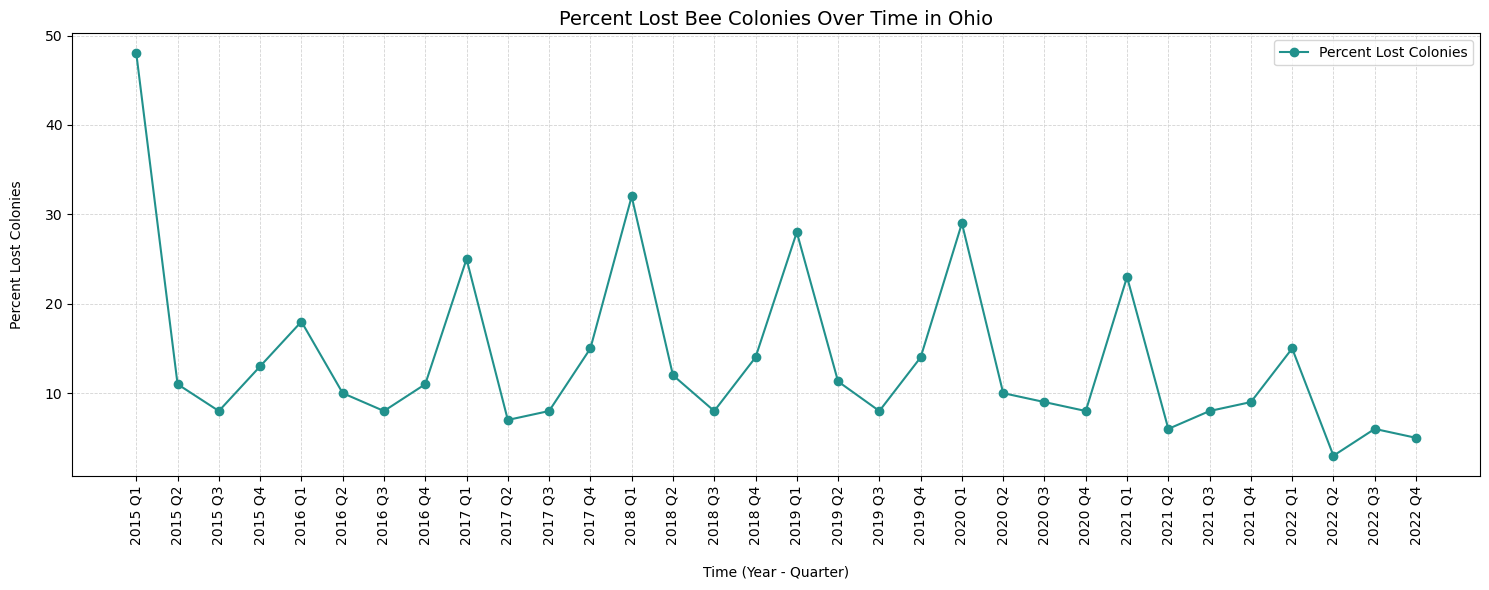

In [6]:
state = 'Ohio'
heatmap_colonies_over_time(bees, state)
plot_bee_colony_trends(bees, state);

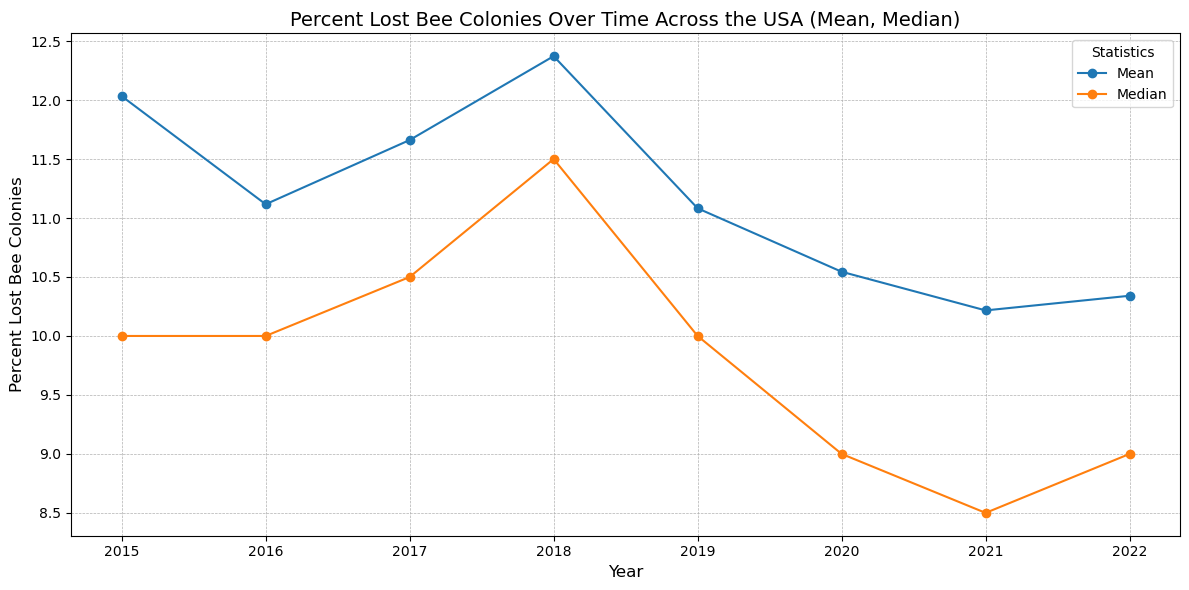

In [7]:
# Group data by year and calculate mean and median
yearly_stats = bees.groupby('year')['percent_lost'].agg(['mean', 'median']).reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot mean
plt.plot(yearly_stats['year'], yearly_stats['mean'], marker='o', label='Mean')

# Plot median
plt.plot(yearly_stats['year'], yearly_stats['median'], marker='o', label='Median')

# Customize the plot
plt.title('Percent Lost Bee Colonies Over Time Across the USA (Mean, Median)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent Lost Bee Colonies', fontsize=12)
plt.legend(title='Statistics')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\tinne\AppData\Local\Temp\ipykernel_399544\1901118700.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



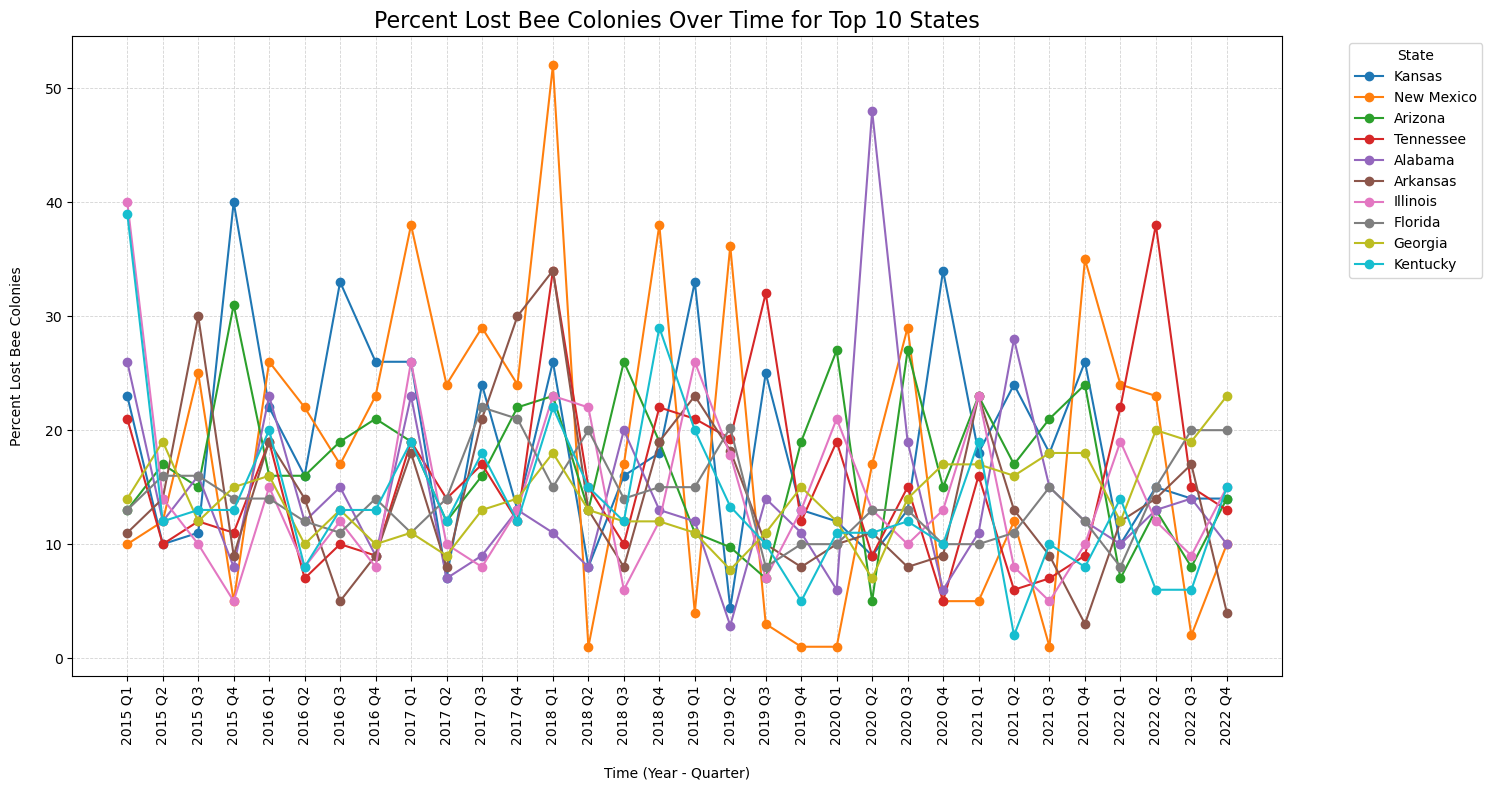

In [8]:
# Calculate the mean percent_lost for each state
state_means = bees.groupby('state')['percent_lost'].mean().sort_values(ascending=False)

# Get the top 10 states
top_10_states = state_means.head(10).index

# Plot for each of the top 10 states
plt.figure(figsize=(15, 8))

# Define a colormap for the states
colors = cm.get_cmap('tab10', len(top_10_states))

for i, state in enumerate(top_10_states):
    # Filter data for the current state and create time column
    state_data = bees[bees['state'] == state].copy()
    state_data['time'] = state_data['year'].astype(str) + ' Q' + state_data['quarter'].astype(str)

    # Sort time
    state_data = state_data.sort_values(by=['year', 'quarter'])

    # Plot
    plt.plot(
        state_data['time'],
        state_data['percent_lost'],
        marker='o',
        color=colors(i),
        label=state
    )

# Customize plot
plt.title('Percent Lost Bee Colonies Over Time for Top 10 States', fontsize=16)
plt.xlabel('Time (Year - Quarter)', labelpad=15)
plt.ylabel('Percent Lost Bee Colonies', labelpad=15)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis to plain notation
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)  # Lighten gridlines
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()

In [9]:
# Calculate correlation matrix for all numeric columns to 'percent_lost'
correlation_matrix = bees.corr(numeric_only=True)['percent_lost'].sort_values(ascending=False)

# Display the correlation matrix
print(correlation_matrix)

percent_lost                     1.000000
other_or_unknown                 0.342712
varroa_mites                     0.237864
diseases                         0.173005
pesticides                       0.155133
lost_colonies                    0.095515
other_pests_and_parasites        0.081833
overcast_sum                     0.081567
clear_sky_sum                    0.073192
longitude                        0.070550
partly_cloudy_sum                0.053736
relative_humidity_2m_maxmax      0.034911
mainly_clear_sum                 0.026737
wind_speed_10m_maxmax            0.022506
D4_mean                          0.021455
D4_max                           0.017561
light_snow_sum                   0.016800
moderate_snow_sum                0.009680
percent_renovated                0.009356
added_colonies                   0.009120
D3_mean                          0.007130
heavy_rain_sum                   0.004382
D2_mean                          0.002762
D3_max                           0

In [10]:
# top 10 correlated features
correlations = correlation_matrix.abs().sort_values(ascending=False).head(11)
correlations


percent_lost                     1.000000
other_or_unknown                 0.342712
varroa_mites                     0.237864
diseases                         0.173005
relative_humidity_2m_minmin      0.157877
pesticides                       0.155133
light_drizzle_sum                0.150503
relative_humidity_2m_meansum     0.131341
relative_humidity_2m_meanmean    0.126643
latitude                         0.118434
D0_max                           0.106872
Name: percent_lost, dtype: float64

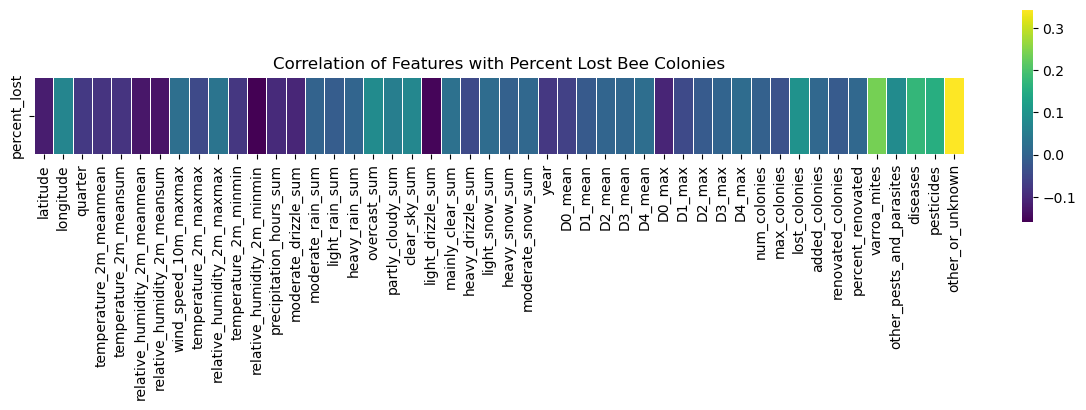

In [11]:
# Filter the correlation matrix to include only correlations with 'num_colonies', percent_lost itself
filtered_corr = bees.corr(numeric_only=True)['percent_lost'].drop(labels=['percent_lost'], errors='ignore')

# Plot the heatmap
plt.figure(figsize=(15, 1))  # Adjust the figure size for a horizontal heatmap
sns.heatmap(
    filtered_corr.to_frame().T,  # Convert to DataFrame for heatmap
    annot=False,
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'shrink': 2.75}  # Adjust the scale bar
)
plt.title('Correlation of Features with Percent Lost Bee Colonies')
plt.show()

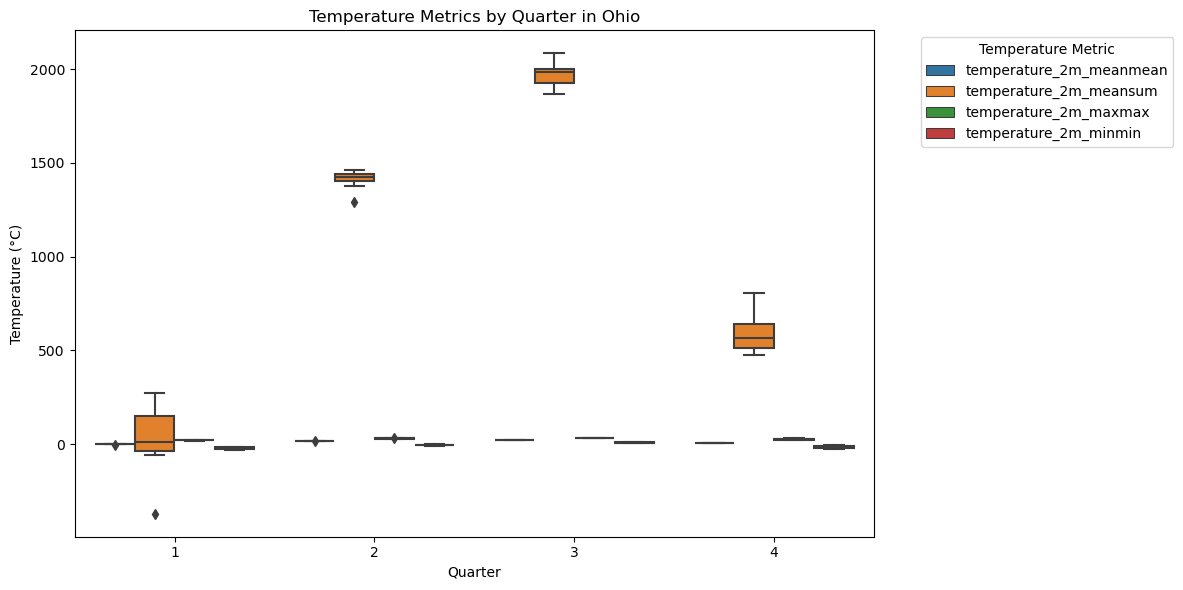

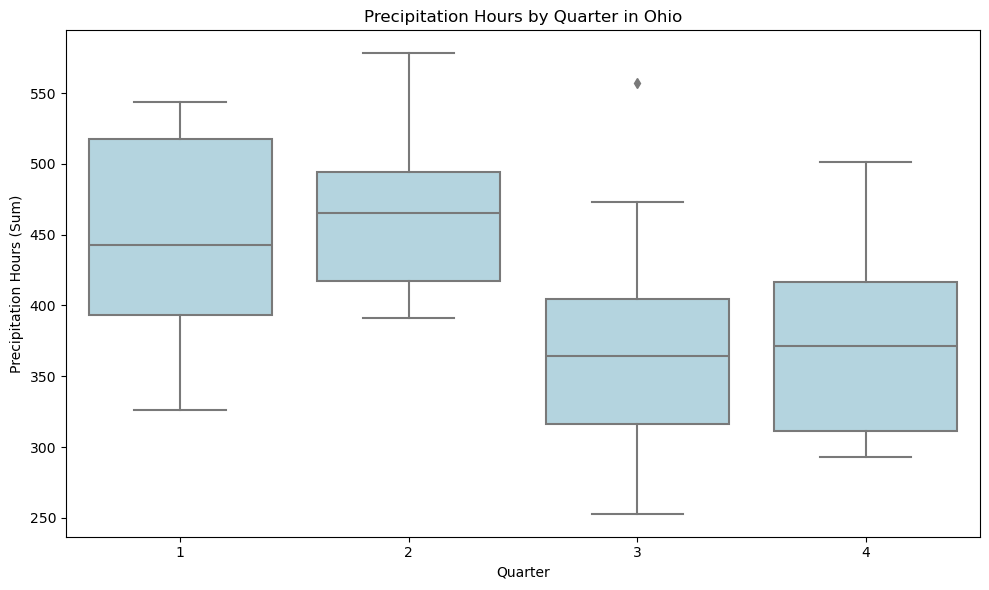

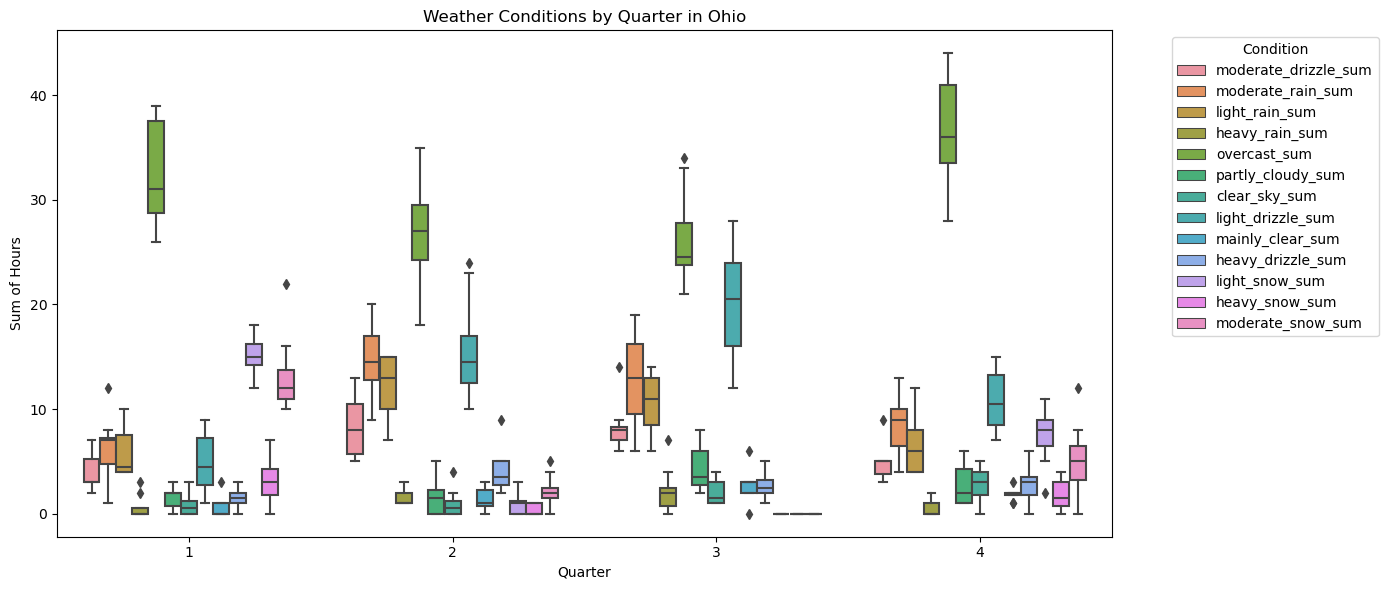

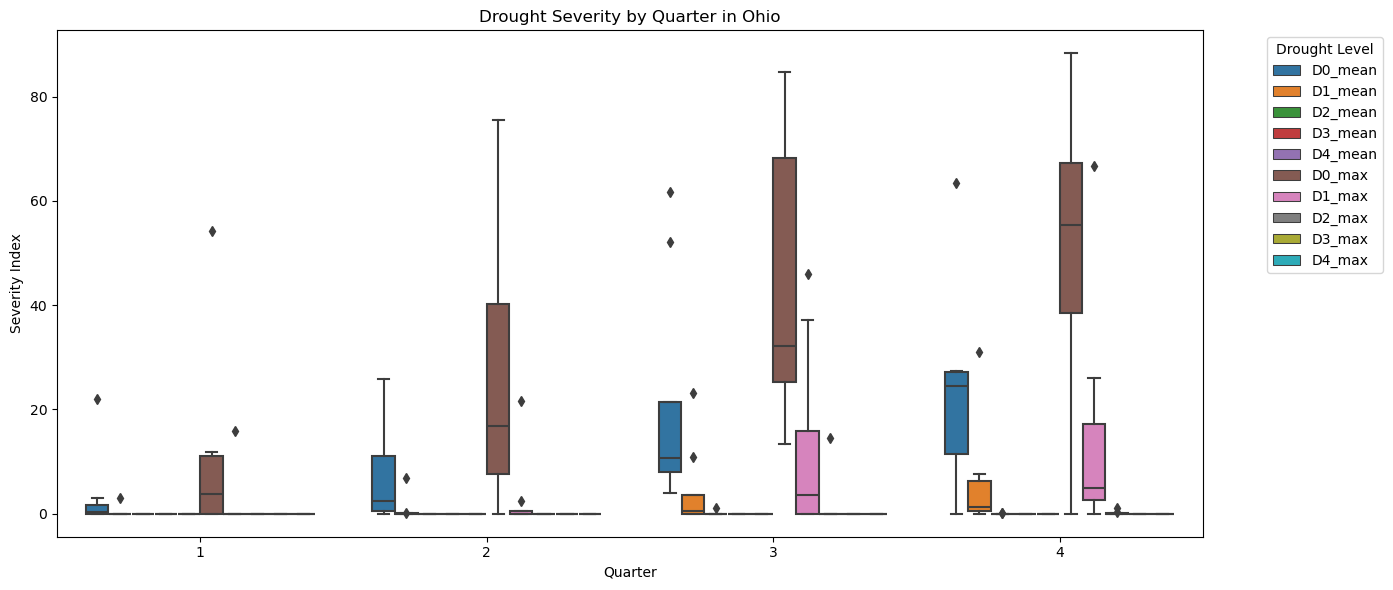

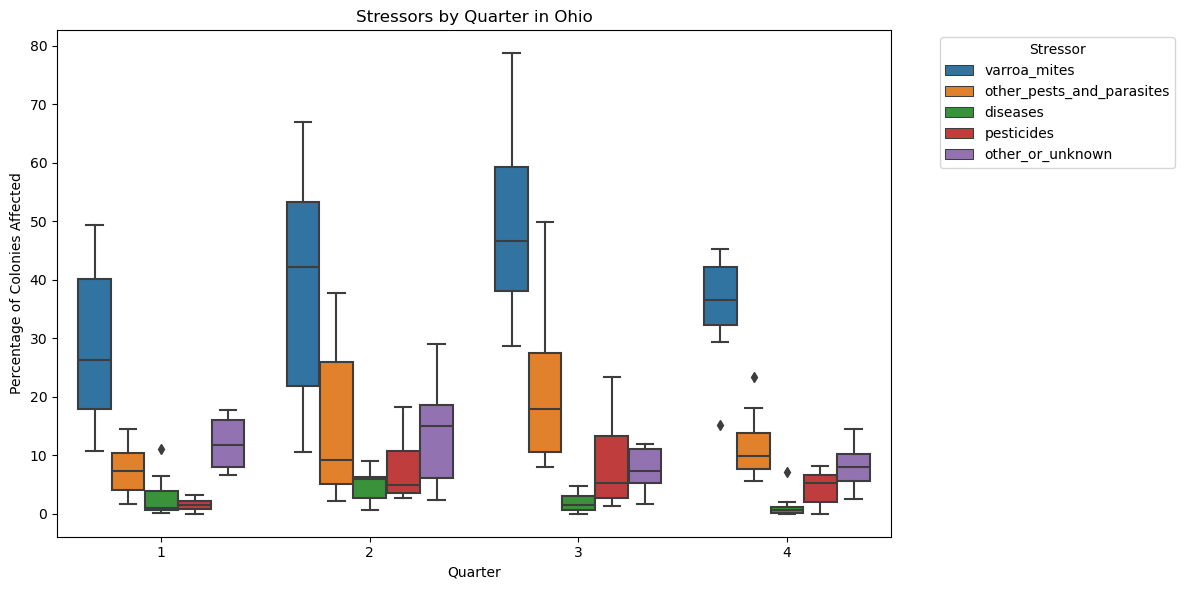

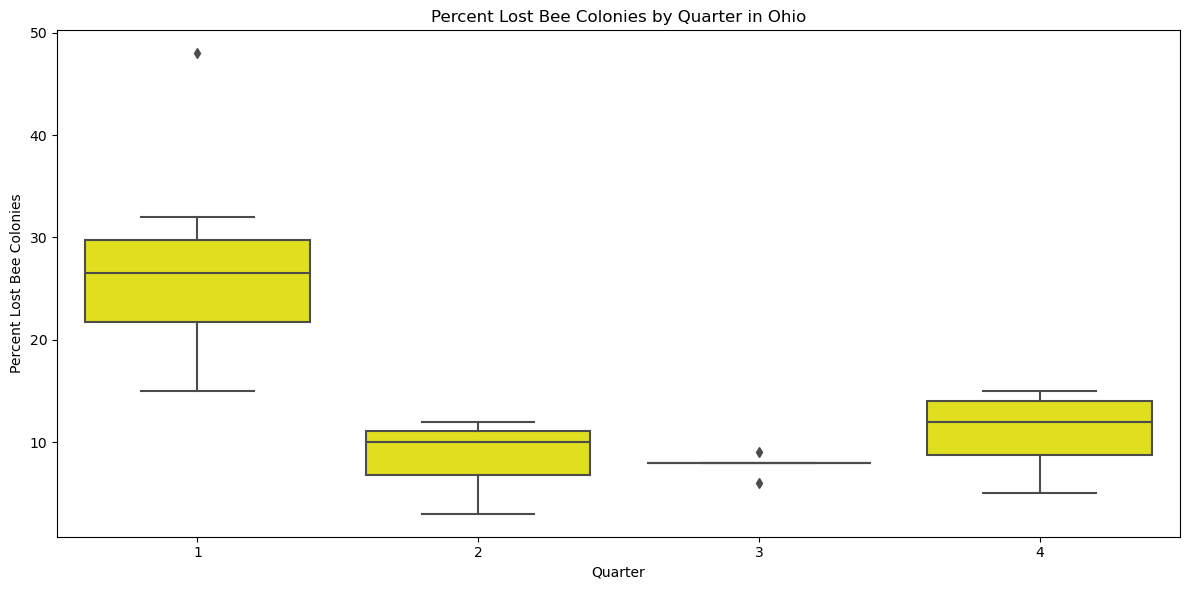

In [7]:
state = 'Ohio'
plot_temperature_features_by_quarter(bees, state)
plot_precipitation_by_quarter(bees, state)
plot_weather_conditions_by_quarter(bees, state)
plot_drought_by_quarter(bees, state)
plot_stressors_by_quarter(bees, state)
plot_percent_loss_by_quarter(bees, state)
